In [ ]:
import sys

# install uplift library scikit-uplift and other libraries 
!{sys.executable} -m pip install scikit-uplift dill lightgbm

In [ ]:
!pip install causalml

     |████████████████████████████████| 406 kB 4.3 MB/s 
     |████████████████████████████████| 564 kB 49.8 MB/s 
     |████████████████████████████████| 1.8 MB 38.3 MB/s 
     |████████████████████████████████| 718 kB 45.6 MB/s 
  Created wheel for causalml: filename=causalml-0.12.3-cp37-cp37m-linux_x86_64.whl size=1050919 sha256=d0af82fb3d0123ac8158419881d6dd6bea10367a80246aa234525654c127ecac
  Stored in directory: /root/.cache/pip/wheels/d7/5e/47/4e965cf8e87c6c10cd7361d910acccd08a1de459f25d55fd23
Successfully built causalml


In [ ]:
!pip install pylift

     |████████████████████████████████| 100 kB 3.9 MB/s 
  Created wheel for pylift: filename=pylift-0.1.5-py3-none-any.whl size=26030 sha256=aa39853e8246ebcb4b9709b6e2954d7adc1fb5602707e6da9175e4b6ef5e0909
  Stored in directory: /root/.cache/pip/wheels/c3/ec/9d/69405e922f27de16e66aada83dce7227f6fddc71639d7cfe66
Successfully built pylift


In [ ]:
!pip install catboost

     |████████████████████████████████| 76.6 MB 1.2 MB/s 


In [ ]:
from sklift.datasets import fetch_criteo
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklift.models import TwoModels
import lightgbm as lgb
from sklift.metrics import qini_auc_score
from sklift.viz import plot_qini_curve


# import dask.dataframe as dd
import numpy as np
import scipy as sp

import causalml
import causalml.metrics as cmetrics
import causalml.inference.tree as ctree
import causalml.inference.meta.xlearner as xlearner
import causalml.inference.meta.rlearner as rlearner
import causalml.inference.meta.tlearner as tlearner
import causalml.inference.meta.slearner as slearner

from causalml.inference.meta import BaseSRegressor, BaseTRegressor, BaseXRegressor, BaseRRegressor
from xgboost import XGBRegressor, XGBClassifier



import pylift
import catboost as cb
import lightgbm as lgb

from sklearn.model_selection import train_test_split

from IPython.display import Image

seed=10

from scipy.stats import chi2_contingency
from typing import List, Tuple


# Generate synthetic data using mode 1
from causalml.dataset import *
from causalml.metrics import *

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from sklift.metrics import weighted_average_uplift
from sklift.metrics import uplift_auc_score
from sklift.metrics import qini_auc_score
from sklift.metrics import uplift_at_k

In [ ]:
from sklift.datasets import fetch_hillstrom
dataset = fetch_hillstrom()

  0%|          | 0.00/443k [00:00<?, ?iB/s]

In [ ]:
data, target, treatment = dataset.data, dataset.target, dataset.treatment

In [ ]:
data.shape, target.shape, treatment.shape

((64000, 8), (64000,), (64000,))

In [ ]:
target.name, treatment.name

('visit', 'segment')

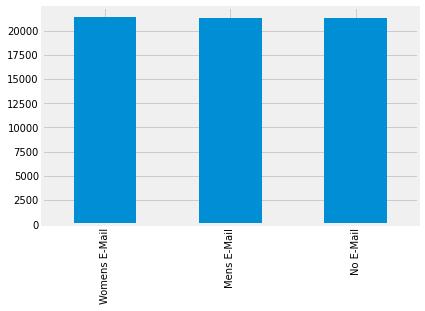

In [ ]:
treatment.value_counts().plot(kind="bar", grid="True");

In [ ]:
treat = {   "Womens E-Mail": 'Sent E-Mail',
            "No E-Mail": 'No E-Mail', 
            "Mens E-Mail": 'Sent E-Mail'}
treatment = treatment.map(treat)
# treatment.value_counts().plot(kind="bar", grid="True");

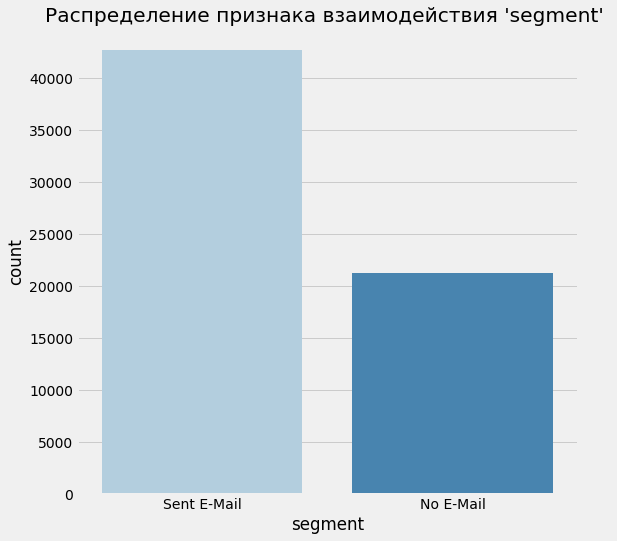

In [ ]:
plt.figure(figsize = (8,8))
sns.countplot(x=pd.Series(treatment), palette = "Blues")
plt.title("Распределение признака взаимодействия 'segment' ")
plt.show()

In [ ]:
treat = {   "Sent E-Mail": 1,
            "No E-Mail": 0}
treatment = treatment.map(treat)

dfT = pd.concat([treatment, target], axis=1)

treatment.value_counts().plot(kind="bar", grid="True");

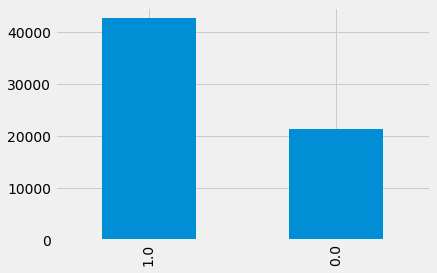

In [ ]:
treatment.value_counts().plot(kind="bar", grid="True");

In [ ]:
features = data.columns.tolist()
dfX = data[features]
dfX.tail(4)

,recency,history_segment,history,mens,womens,zip_code,newbie,channel
63996,5,1) $0 - $100,38.91,0,1,Urban,1,Phone
63997,6,1) $0 - $100,29.99,1,0,Urban,1,Phone
63998,1,5) $500 - $750,552.94,1,0,Surburban,1,Multichannel
63999,1,4) $350 - $500,472.82,0,1,Surburban,0,Web


In [ ]:
dfXn = pd.get_dummies(dfX, dtype=float)
dfXn.tail(4)

,recency,history,mens,womens,newbie,history_segment_1) $0 - $100,history_segment_2) $100 - $200,history_segment_3) $200 - $350,history_segment_4) $350 - $500,history_segment_5) $500 - $750,"history_segment_6) $750 - $1,000","history_segment_7) $1,000 +",zip_code_Rural,zip_code_Surburban,zip_code_Urban,channel_Multichannel,channel_Phone,channel_Web
63996,5,38.91,0,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
63997,6,29.99,1,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
63998,1,552.94,1,0,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
63999,1,472.82,0,1,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [ ]:
dfXn.shape

(64000, 18)

In [ ]:
for c in dfXn.columns:
    dfXn[c] = pd.to_numeric(dfXn[c], downcast='float')

treatment = treatment.astype('float')
target = target.astype('float')

In [ ]:
X_train, X_val, trmnt_train, trmnt_val, y_train, y_val = \
        train_test_split(   dfXn,
                            treatment,
                            target,
                            stratify=dfT,
                            test_size=0.3,
                            random_state=42)

print(f"training: {X_train.shape}")
print(f"testing: {X_val.shape}")

training: (44800, 18)
testing: (19200, 18)


In [ ]:
df_all_scores = pd.DataFrame()
df_all_metrics= pd.DataFrame()

df_all_metrics['model'] = 'default'
df_all_metrics['uplift@k'] = 'default'
df_all_metrics['uplift_weighted'] = 'default'
df_all_metrics['auuc'] = 'default'
df_all_metrics['qini'] = 'default'

[05:35:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
(19200, 1) (1, 5)


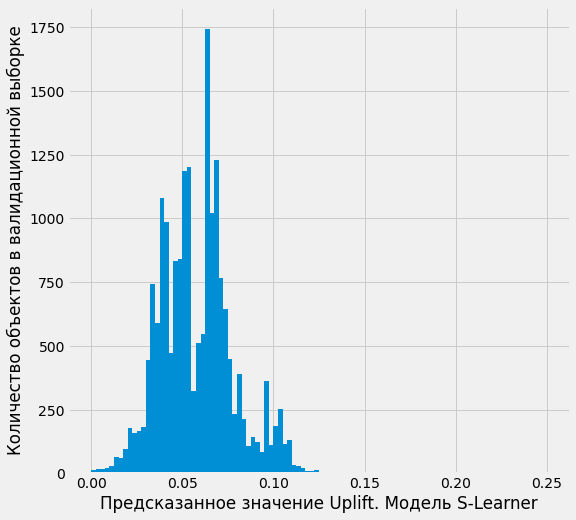

In [ ]:
# S-Learner 

learner_s = BaseSRegressor(XGBRegressor(), control_name=0)

learner_s.fit(
    X=X_train,
    treatment=trmnt_train,
    y=y_train
)

s_learner_pred = pd.DataFrame(learner_s.predict(X_val))
s_learner_pred = s_learner_pred.rename(columns={0:'S-Learner'})

s_learner_pred = s_learner_pred.join(pd.Series(trmnt_val).rename('treatment').reset_index(drop=True)) # ['treatment']
s_learner_pred = s_learner_pred.join(pd.Series(y_val).rename('target').reset_index(drop=True)) # ['visit']

# add scores to total df
df_all_scores['s_learner_pred'] = s_learner_pred['S-Learner']
# add metrics to total df 
df_all_metrics = df_all_metrics.append({ 
                       'model' : 'S-Learner',
                       'uplift@k' : uplift_at_k(s_learner_pred['target'], s_learner_pred['S-Learner'], s_learner_pred['treatment'], strategy='overall', k=0.1),
                       'uplift_weighted' : weighted_average_uplift(s_learner_pred['target'], s_learner_pred['S-Learner'], s_learner_pred['treatment']),
                       'auuc' : cmetrics.auuc_score(s_learner_pred, treatment_col='treatment', outcome_col='target')['S-Learner'],
                       'qini' : cmetrics.qini_score(s_learner_pred, treatment_col='treatment', outcome_col='target', normalize=True)['S-Learner']
}, ignore_index=True)

print(df_all_scores.shape, df_all_metrics.shape)

plt.figure(figsize=(8, 8))
plt.hist(s_learner_pred['S-Learner'], range=(0, 0.25), bins=100)
plt.xlabel("Предсказанное значение Uplift. Модель S-Learner")
plt.ylabel("Количество объектов в валидационной выборке")
plt.show()

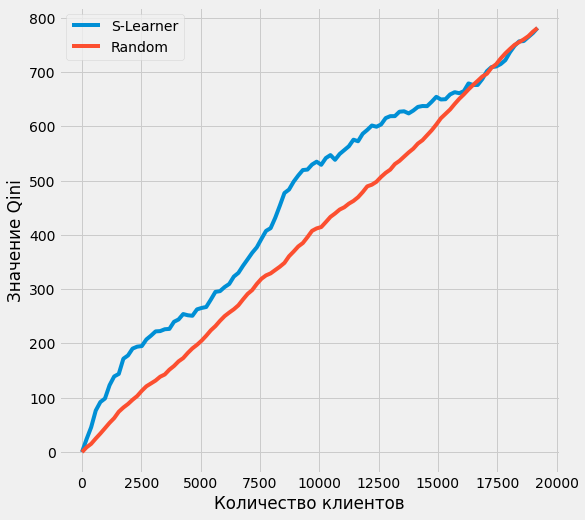

In [ ]:
cmetrics.plot_qini(
    s_learner_pred,
    treatment_col='treatment',
    outcome_col='target'
)
plt.xlabel("Количество клиентов")
plt.ylabel("Значение Qini")
plt.show()

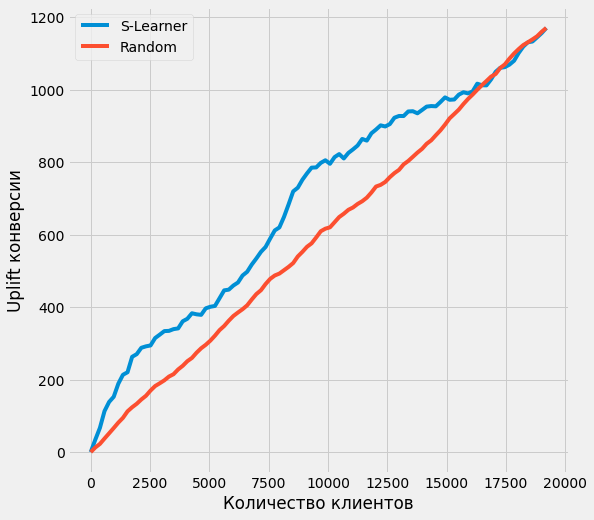

In [ ]:
cmetrics.plot_gain(
    s_learner_pred,
    treatment_col='treatment',
    outcome_col='target'
)
plt.xlabel("Количество клиентов")
plt.ylabel("Uplift конверсии")
plt.show()

In [ ]:
df_all_metrics.head()

,model,uplift@k,uplift_weighted,auuc,qini
0,S-Learner,0.137887,0.060713,0.58905,0.084343


[05:35:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:35:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
(19200, 2) (2, 5)


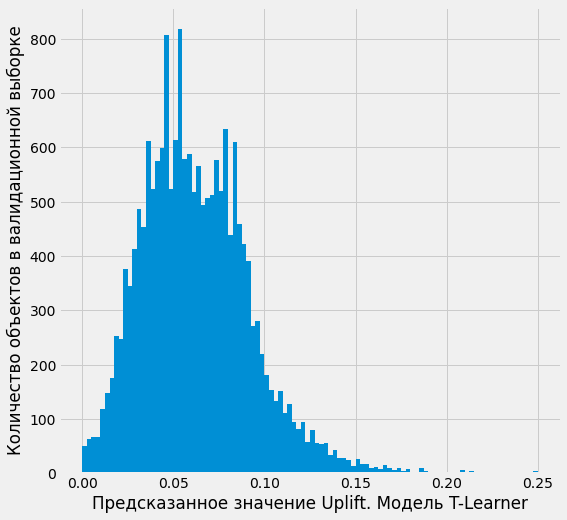

In [ ]:
# T-Learner 

learner_t = BaseTRegressor(XGBRegressor(), control_name=0)

learner_t.fit(
    X=X_train,
    treatment=trmnt_train,
    y=y_train
)

t_learner_pred = pd.DataFrame(learner_t.predict(X_val))
t_learner_pred = t_learner_pred.rename(columns={0:'T-Learner'})

t_learner_pred = t_learner_pred.join(pd.Series(trmnt_val).rename('treatment').reset_index(drop=True)) # ['treatment']
t_learner_pred = t_learner_pred.join(pd.Series(y_val).rename('target').reset_index(drop=True)) # ['visit']

# add scores to total df
df_all_scores['t_learner_pred'] = t_learner_pred['T-Learner']
# add metrics to total df 
df_all_metrics = df_all_metrics.append({ 
                       'model' : 'T-Learner',
                       'uplift@k' : uplift_at_k(t_learner_pred['target'], t_learner_pred['T-Learner'], t_learner_pred['treatment'], strategy='overall', k=0.1),
                       'uplift_weighted' : weighted_average_uplift(t_learner_pred['target'], t_learner_pred['T-Learner'], t_learner_pred['treatment']),
                       'auuc' : cmetrics.auuc_score(t_learner_pred, treatment_col='treatment', outcome_col='target')['T-Learner'],
                       'qini' : cmetrics.qini_score(t_learner_pred, treatment_col='treatment', outcome_col='target', normalize=True)['T-Learner']
}, ignore_index=True)

print(df_all_scores.shape, df_all_metrics.shape)

plt.figure(figsize=(8, 8))
plt.hist(t_learner_pred['T-Learner'], range=(0, 0.25), bins=100)
plt.xlabel("Предсказанное значение Uplift. Модель T-Learner")
plt.ylabel("Количество объектов в валидационной выборке")
plt.show()

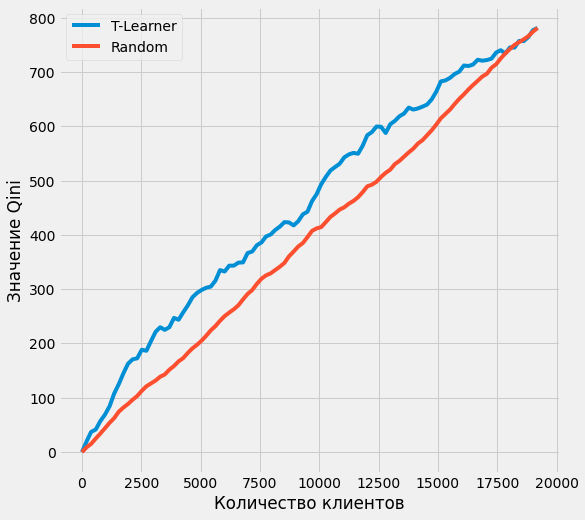

In [ ]:
cmetrics.plot_qini(
    t_learner_pred,
    treatment_col='treatment',
    outcome_col='target'
)
plt.xlabel("Количество клиентов")
plt.ylabel("Значение Qini")
plt.show()

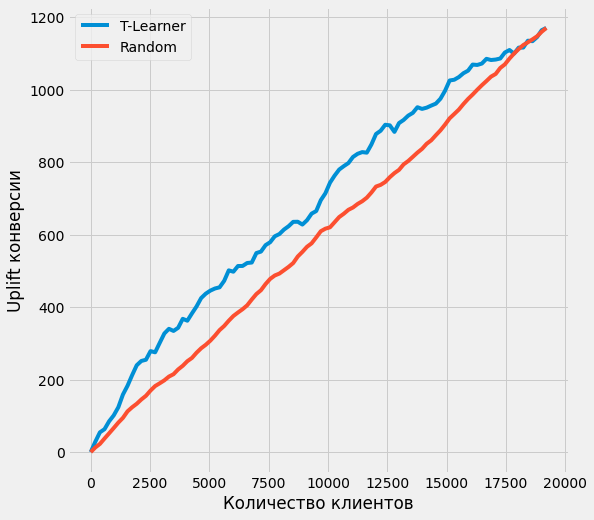

In [ ]:
cmetrics.plot_gain(
    t_learner_pred,
    treatment_col='treatment',
    outcome_col='target'
)
plt.xlabel("Количество клиентов")
plt.ylabel("Uplift конверсии")
plt.show()

[05:37:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:37:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:37:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:37:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
(19200, 3) (3, 5)


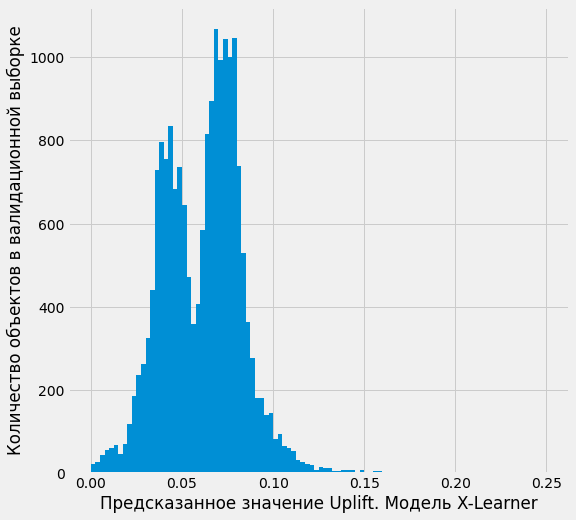

In [ ]:
# X-Learner 

learner_x = BaseXRegressor(XGBRegressor(), control_name=0)

learner_x.fit(
    X=X_train,
    treatment=trmnt_train,
    y=y_train
)

x_learner_pred = pd.DataFrame(learner_x.predict(X_val))
x_learner_pred = x_learner_pred.rename(columns={0:'X-Learner'})

x_learner_pred = x_learner_pred.join(pd.Series(trmnt_val).rename('treatment').reset_index(drop=True)) # ['treatment']
x_learner_pred = x_learner_pred.join(pd.Series(y_val).rename('target').reset_index(drop=True)) # ['visit']

# add scores to total df
df_all_scores['x_learner_pred'] = x_learner_pred['X-Learner']
# add metrics to total df 
df_all_metrics = df_all_metrics.append({ 
                       'model' : 'X-Learner',
                       'uplift@k' : uplift_at_k(x_learner_pred['target'], x_learner_pred['X-Learner'], x_learner_pred['treatment'], strategy='overall', k=0.1),
                       'uplift_weighted' : weighted_average_uplift(x_learner_pred['target'], x_learner_pred['X-Learner'], x_learner_pred['treatment']),
                       'auuc' : cmetrics.auuc_score(x_learner_pred, treatment_col='treatment', outcome_col='target')['X-Learner'],
                       'qini' : cmetrics.qini_score(x_learner_pred, treatment_col='treatment', outcome_col='target', normalize=True)['X-Learner']
}, ignore_index=True)

print(df_all_scores.shape, df_all_metrics.shape)

plt.figure(figsize=(8, 8))
plt.hist(x_learner_pred['X-Learner'], range=(0, 0.25), bins=100)
plt.xlabel("Предсказанное значение Uplift. Модель X-Learner")
plt.ylabel("Количество объектов в валидационной выборке")
plt.show()

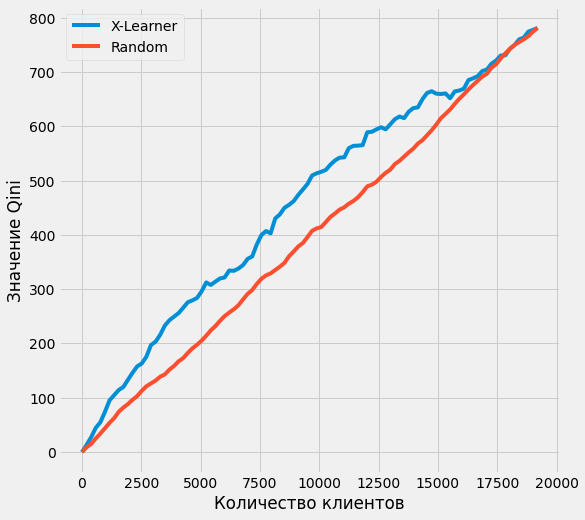

In [ ]:
cmetrics.plot_qini(
    x_learner_pred,
    treatment_col='treatment',
    outcome_col='target'
)
plt.xlabel("Количество клиентов")
plt.ylabel("Значение Qini")
plt.show()

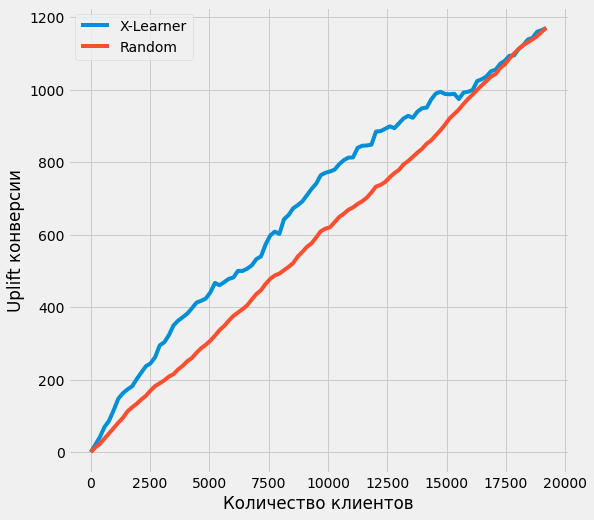

In [ ]:
cmetrics.plot_gain(
    x_learner_pred,
    treatment_col='treatment',
    outcome_col='target'
)
plt.xlabel("Количество клиентов")
plt.ylabel("Uplift конверсии")
plt.show()

[05:39:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
(19200, 4) (4, 5)


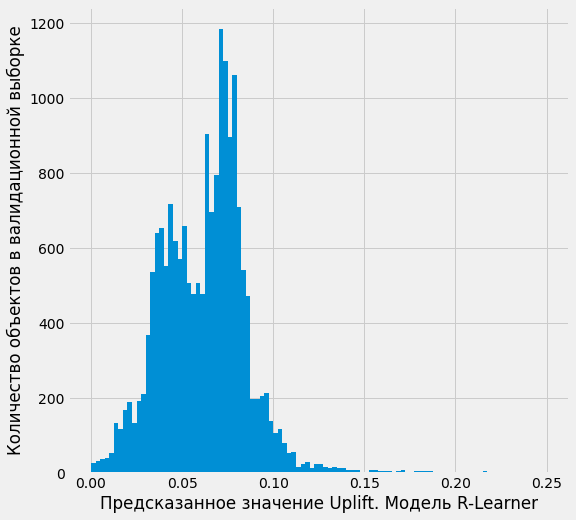

In [ ]:
# R-Learner 

learner_r = BaseRRegressor(XGBRegressor(), control_name=0)

learner_r.fit(
    X=X_train,
    treatment=trmnt_train,
    y=y_train
)

r_learner_pred = pd.DataFrame(learner_r.predict(X_val))
r_learner_pred = r_learner_pred.rename(columns={0:'R-Learner'})

r_learner_pred = r_learner_pred.join(pd.Series(trmnt_val).rename('treatment').reset_index(drop=True)) # ['treatment']
r_learner_pred = r_learner_pred.join(pd.Series(y_val).rename('target').reset_index(drop=True)) # ['visit']

# add scores to total df
df_all_scores['r_learner_pred'] = r_learner_pred['R-Learner']
# add metrics to total df 
df_all_metrics = df_all_metrics.append({ 
                       'model' : 'R-Learner',
                       'uplift@k' : uplift_at_k(r_learner_pred['target'], r_learner_pred['R-Learner'], r_learner_pred['treatment'], strategy='overall', k=0.1),
                       'uplift_weighted' : weighted_average_uplift(r_learner_pred['target'], r_learner_pred['R-Learner'], r_learner_pred['treatment']),
                       'auuc' : cmetrics.auuc_score(r_learner_pred, treatment_col='treatment', outcome_col='target')['R-Learner'],
                       'qini' : cmetrics.qini_score(r_learner_pred, treatment_col='treatment', outcome_col='target', normalize=True)['R-Learner']
}, ignore_index=True)

print(df_all_scores.shape, df_all_metrics.shape)

plt.figure(figsize=(8, 8))
plt.hist(r_learner_pred['R-Learner'], range=(0, 0.25), bins=100)
plt.xlabel("Предсказанное значение Uplift. Модель R-Learner")
plt.ylabel("Количество объектов в валидационной выборке")
plt.show()

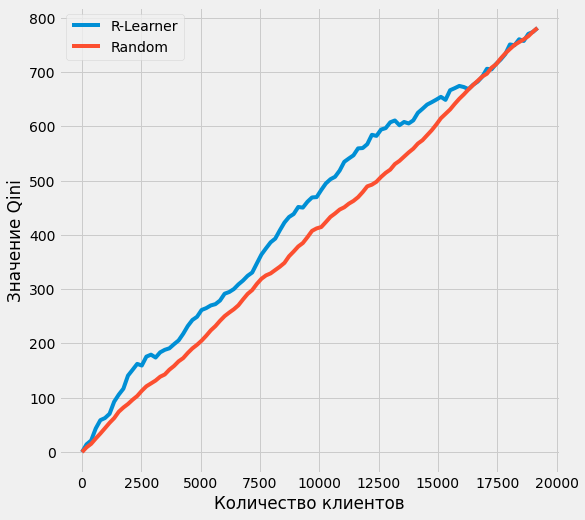

In [ ]:
cmetrics.plot_qini(
    r_learner_pred,
    treatment_col='treatment',
    outcome_col='target'
)
plt.xlabel("Количество клиентов")
plt.ylabel("Значение Qini")
plt.show()

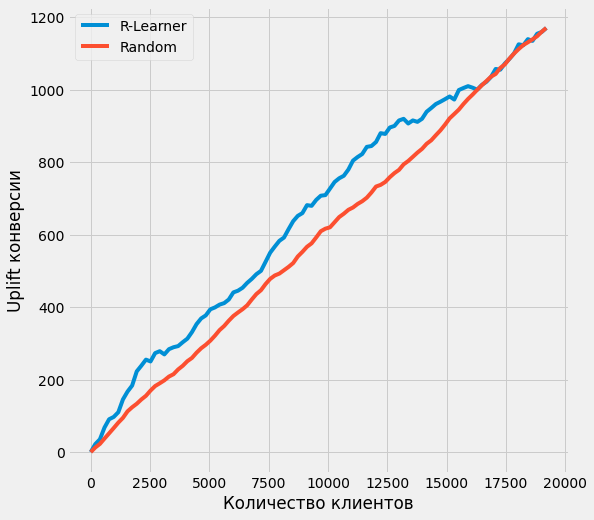

In [ ]:
cmetrics.plot_gain(
    r_learner_pred,
    treatment_col='treatment',
    outcome_col='target'
)
plt.xlabel("Количество клиентов")
plt.ylabel("Uplift конверсии")
plt.show()

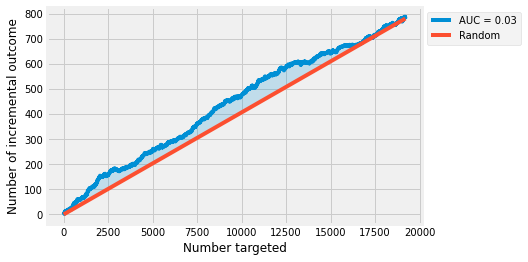

In [ ]:
from sklift.viz import plot_qini_curve
plot_qini_curve(r_learner_pred['target'], r_learner_pred['R-Learner'], r_learner_pred['treatment'], perfect=False);

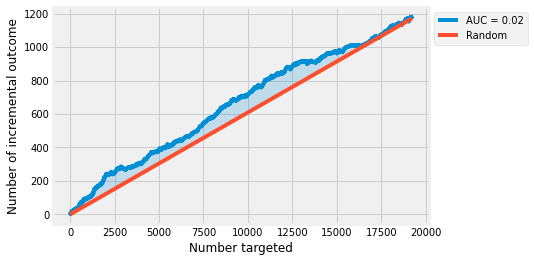

In [ ]:
from sklift.viz import plot_uplift_curve
plot_uplift_curve(r_learner_pred['target'], r_learner_pred['R-Learner'], r_learner_pred['treatment'], perfect=False);

In [ ]:
df_all_metrics.head()

,model,uplift@k,uplift_weighted,auuc,qini
0,S-Learner,0.137887,0.060713,0.589050,0.084343
1,T-Learner,0.120288,0.061102,0.582707,0.078978
2,X-Learner,0.101982,0.061063,0.582617,0.079233
3,R-Learner,0.114596,0.061066,0.562429,0.055826


In [ ]:
model_tree = ctree.UpliftRandomForestClassifier(
    control_name='control',
    evaluationFunction='KL',
    n_estimators=10,
    max_depth=3,
    min_samples_leaf=5
)
model_tree.fit(
    X=X_train.values,
    treatment=pd.Series(trmnt_train).apply(lambda t: 'treatment' if t == 1 else 'control').values,
    y=y_train.values
)

In [ ]:
cols_features = X_train.columns

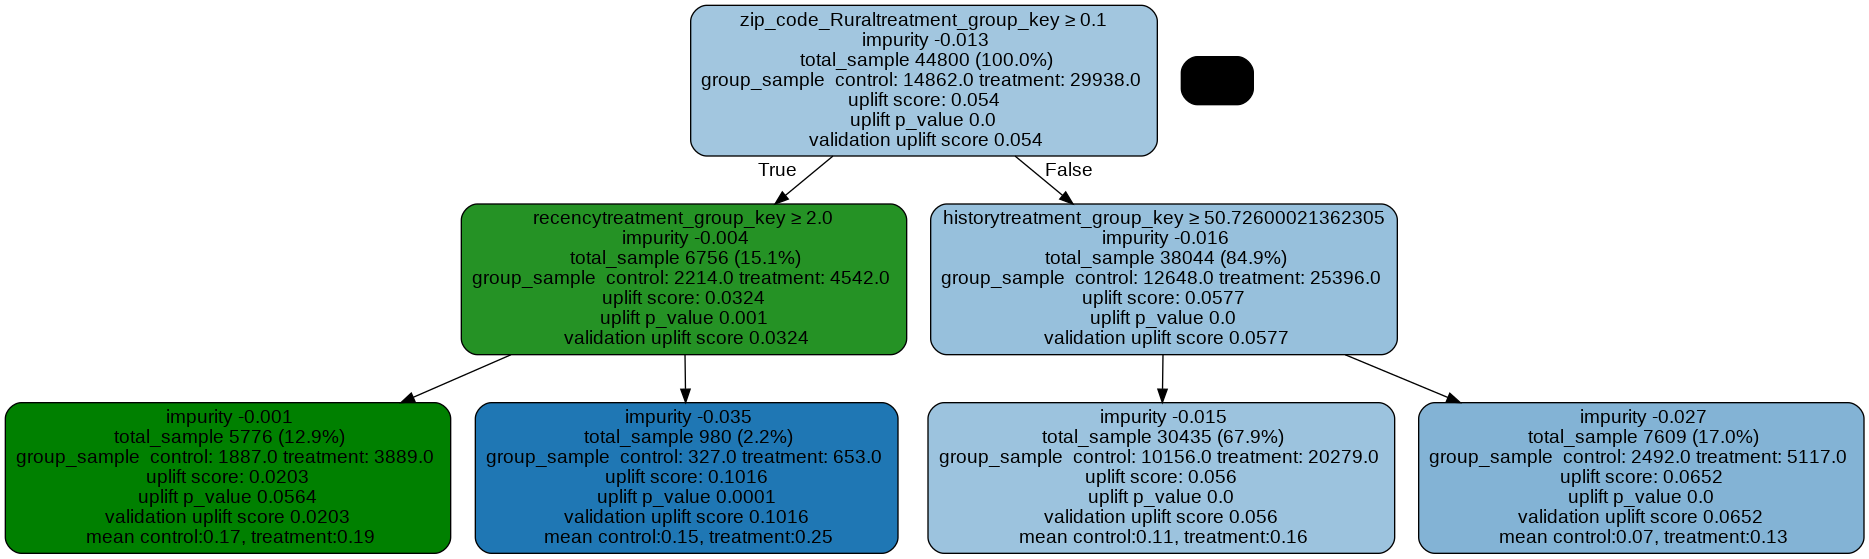

In [ ]:
graph = ctree.uplift_tree_plot(model_tree.uplift_forest[0].fitted_uplift_tree, cols_features)
Image(graph.create_png())

(19200, 5) (5, 5)


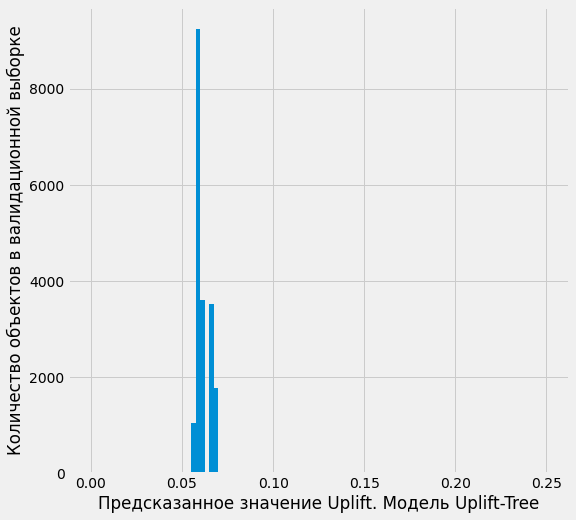

In [ ]:
# Uplift tree

tree_pred = pd.DataFrame(model_tree.predict(X_val))
tree_pred = tree_pred.rename(columns={0:'Uplift-Tree'})

tree_pred = tree_pred.join(pd.Series(trmnt_val).rename('treatment').reset_index(drop=True)) # ['treatment']
tree_pred = tree_pred.join(pd.Series(y_val).rename('target').reset_index(drop=True)) # ['visit']

# add scores to total df
df_all_scores['tree_pred'] = tree_pred['Uplift-Tree']
# add metrics to total df 
df_all_metrics = df_all_metrics.append({ 
                       'model' : 'Uplift-Tree',
                       'uplift@k' : uplift_at_k(tree_pred['target'], tree_pred['Uplift-Tree'], tree_pred['treatment'], strategy='overall', k=0.1),
                       'uplift_weighted' : weighted_average_uplift(tree_pred['target'], tree_pred['Uplift-Tree'], tree_pred['treatment']),
                       'auuc' : cmetrics.auuc_score(tree_pred, treatment_col='treatment', outcome_col='target')['Uplift-Tree'],
                       'qini' : cmetrics.qini_score(tree_pred, treatment_col='treatment', outcome_col='target', normalize=True)['Uplift-Tree']
}, ignore_index=True)

print(df_all_scores.shape, df_all_metrics.shape)

plt.figure(figsize=(8, 8))
plt.hist(tree_pred['Uplift-Tree'], range=(0, 0.25), bins=100)
plt.xlabel("Предсказанное значение Uplift. Модель Uplift-Tree")
plt.ylabel("Количество объектов в валидационной выборке")
plt.show()

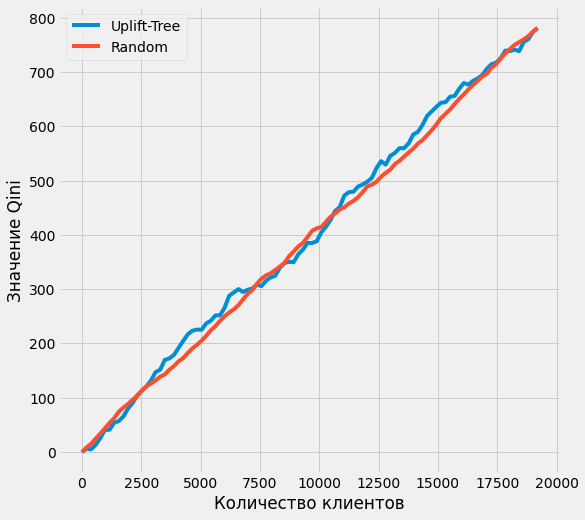

In [ ]:
cmetrics.plot_qini(
    tree_pred,
    treatment_col='treatment',
    outcome_col='target'
)
plt.xlabel("Количество клиентов")
plt.ylabel("Значение Qini")
plt.show()

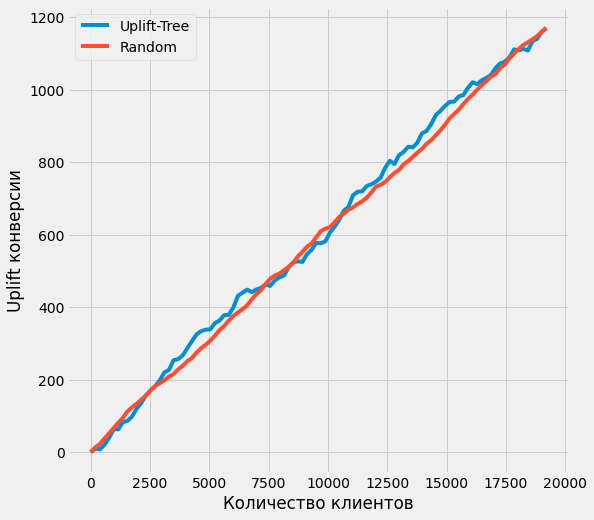

In [ ]:
cmetrics.plot_gain(
    tree_pred,
    treatment_col='treatment',
    outcome_col='target'
)
plt.xlabel("Количество клиентов")
plt.ylabel("Uplift конверсии")
plt.show()

In [ ]:
# df_all_metrics = df_all_metrics.drop(5, axis=0)
df_all_metrics.head(10)

,model,uplift@k,uplift_weighted,auuc,qini
0,S-Learner,0.137887,0.060713,0.589050,0.084343
1,T-Learner,0.120288,0.061102,0.582707,0.078978
2,X-Learner,0.101982,0.061063,0.582617,0.079233
3,R-Learner,0.114596,0.061066,0.562429,0.055826
4,Uplift-Tree,0.058377,0.061468,0.514706,0.010460


In [ ]:
df_all_scores = df_all_scores.join(pd.Series(trmnt_val).rename('treatment').reset_index(drop=True))
df_all_scores = df_all_scores.join(pd.Series(y_val).rename('target').reset_index(drop=True))

In [ ]:
df_all_scores.columns = ['S-Learner', 'T-Learner', 'X-Learner', 'R-Learner', 'Uplift-Tree', 'treatment', 'target']

df_all_scores.head(10)

,S-Learner,T-Learner,X-Learner,R-Learner,Uplift-Tree,treatment,target
0,0.040252,0.020058,0.032751,0.033257,0.057546,1.0,0.0
1,0.040835,0.046742,0.054170,0.047534,0.067997,1.0,0.0
2,0.035860,0.059239,0.049322,0.068762,0.061095,0.0,0.0
3,0.062404,0.063516,0.091065,0.000773,0.065220,1.0,0.0
4,0.065695,0.067897,0.078435,0.080125,0.067997,1.0,0.0
5,0.052459,0.043180,0.046216,0.046463,0.055243,1.0,0.0
6,0.017590,-0.002666,0.033628,0.031998,0.058319,0.0,0.0
7,0.063823,0.041191,0.076137,0.083678,0.059256,1.0,0.0
8,0.105650,0.006584,0.016190,-0.023822,0.061131,1.0,0.0
9,0.062005,0.082383,0.073970,0.072656,0.057546,1.0,1.0


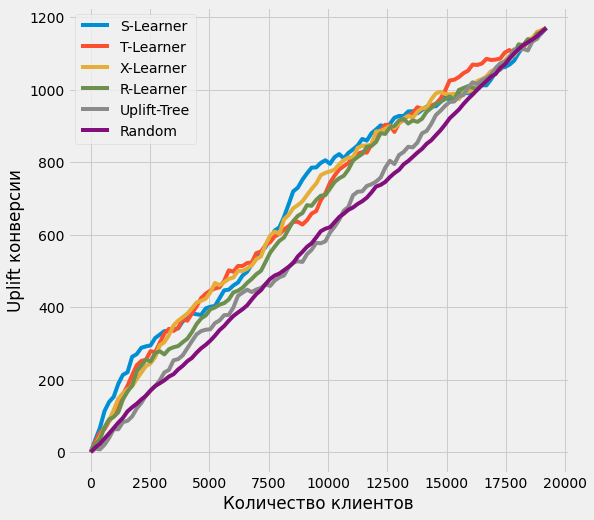

In [ ]:
cmetrics.plot_gain(
    df_all_scores,
    treatment_col='treatment',
    outcome_col='target'
)
plt.xlabel("Количество клиентов")
plt.ylabel("Uplift конверсии")
plt.show()

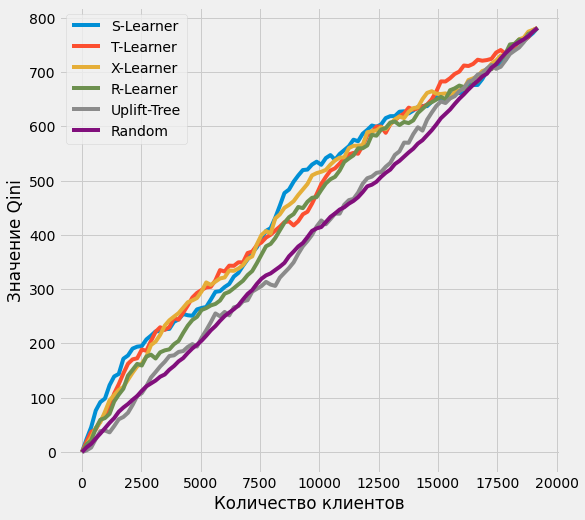

In [ ]:
cmetrics.plot_qini(
    df_all_scores,
    treatment_col='treatment',
    outcome_col='target'
)
plt.xlabel("Количество клиентов")
plt.ylabel("Значение Qini")
plt.show()

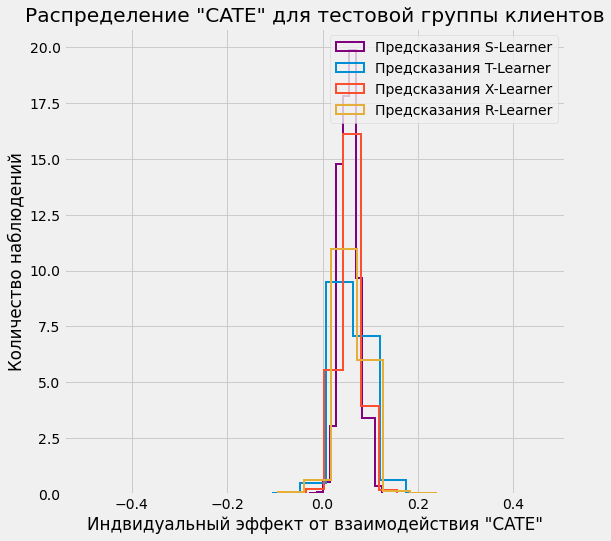

In [ ]:
groups = learner_r._classes

alpha = 1
linewidth = 2
bins = 15

for group,idx in sorted(groups.items(), key=lambda x: x[1]):
    plt.figure(figsize=(8,8))
    plt.hist(df_all_scores['S-Learner'], alpha=alpha, bins=bins, label='Предсказания S-Learner',
             histtype='step', linewidth=linewidth, density=True, color='purple',)
    plt.hist(df_all_scores['T-Learner'], alpha=alpha, bins=bins, label='Предсказания T-Learner',
             histtype='step', linewidth=linewidth, density=True)
    plt.hist(df_all_scores['X-Learner'], alpha=alpha, bins=bins, label='Предсказания X-Learner',
             histtype='step', linewidth=linewidth, density=True)
    plt.hist(df_all_scores['R-Learner'], alpha=alpha, bins=bins, label='Предсказания R-Learner',
             histtype='step', linewidth=linewidth, density=True)
    # plt.hist(df_all_scores['Uplift-Tree'], alpha=alpha, bins=bins, label='Предсказания Uplift-Tree',
    #          histtype='step', linewidth=linewidth, density=True)
    # plt.hist(tau, alpha=alpha, bins=bins, label='Настоящее распределение "CATE"',
    #          histtype='step', linewidth=linewidth, color='green', density=True)
    # plt.vlines(tau.mean(), 0, plt.axes().get_ylim()[1], label='Среднее настоящее "CATE"',
    #            linestyles='dotted', linewidth=linewidth, color='green')
    
    plt.title('Распределение "CATE" для тестовой группы клиентов')
    plt.xlabel('Индвидуальный эффект от взаимодействия "CATE"')
    plt.ylabel('Количество наблюдений')
    _=plt.legend()

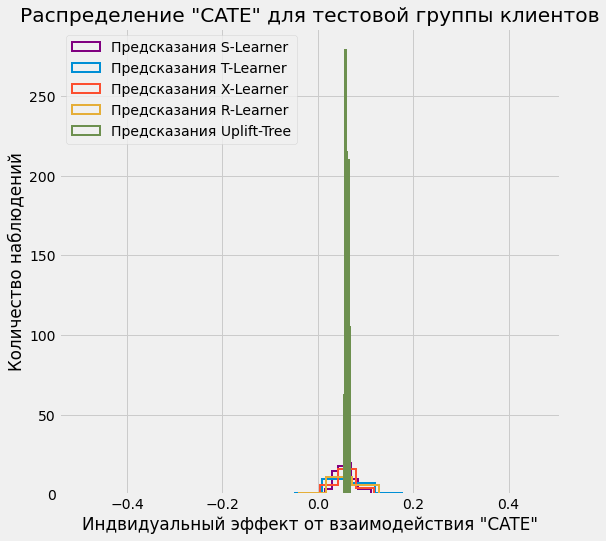

In [ ]:
groups = learner_r._classes

alpha = 1
linewidth = 2
bins = 15

for group,idx in sorted(groups.items(), key=lambda x: x[1]):
    plt.figure(figsize=(8,8))
    plt.hist(df_all_scores['S-Learner'], alpha=alpha, bins=bins, label='Предсказания S-Learner',
             histtype='step', linewidth=linewidth, density=True, color='purple',)
    plt.hist(df_all_scores['T-Learner'], alpha=alpha, bins=bins, label='Предсказания T-Learner',
             histtype='step', linewidth=linewidth, density=True)
    plt.hist(df_all_scores['X-Learner'], alpha=alpha, bins=bins, label='Предсказания X-Learner',
             histtype='step', linewidth=linewidth, density=True)
    plt.hist(df_all_scores['R-Learner'], alpha=alpha, bins=bins, label='Предсказания R-Learner',
             histtype='step', linewidth=linewidth, density=True)
    plt.hist(df_all_scores['Uplift-Tree'], alpha=alpha, bins=bins, label='Предсказания Uplift-Tree',
             histtype='step', linewidth=linewidth, density=True)
    # plt.hist(tau, alpha=alpha, bins=bins, label='Настоящее распределение "CATE"',
    #          histtype='step', linewidth=linewidth, color='green', density=True)
    # plt.vlines(tau.mean(), 0, plt.axes().get_ylim()[1], label='Среднее настоящее "CATE"',
    #            linestyles='dotted', linewidth=linewidth, color='green')
    
    plt.title('Распределение "CATE" для тестовой группы клиентов')
    plt.xlabel('Индвидуальный эффект от взаимодействия "CATE"')
    plt.ylabel('Количество наблюдений')
    _=plt.legend()

In [ ]:
df_all_scores.head()

,S-Learner,T-Learner,X-Learner,R-Learner,Uplift-Tree,treatment,target
0,0.040252,0.020058,0.032751,0.033257,0.057546,1.0,0.0
1,0.040835,0.046742,0.054170,0.047534,0.067997,1.0,0.0
2,0.035860,0.059239,0.049322,0.068762,0.061095,0.0,0.0
3,0.062404,0.063516,0.091065,0.000773,0.065220,1.0,0.0
4,0.065695,0.067897,0.078435,0.080125,0.067997,1.0,0.0


In [ ]:
df_all_scores['target'].value_counts()

0.0    16382
1.0     2818
Name: target, dtype: int64

In [ ]:
df_all_scores['treatment'].value_counts()

1.0    12809
0.0     6391
Name: treatment, dtype: int64

In [ ]:
X_names = ['recency', 'mens', 'womens', 'zip_code_Rural', 'zip_code_Surburban', 'zip_code_Urban', 'channel_Multichannel', 'channel_Phone', 'channel_Web', 'newbie']
X_train[X_names].head()

,recency,mens,womens,zip_code_Rural,zip_code_Surburban,zip_code_Urban,channel_Multichannel,channel_Phone,channel_Web,newbie
25453,2.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
12800,6.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
2290,4.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
31961,8.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
19324,10.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0


In [ ]:
X_train['history'].head()

25453    403.720001
12800    123.589996
2290     194.250000
31961    260.480011
19324    272.350006
Name: history, dtype: float32

In [ ]:
X_val.shape

(19200, 18)

In [ ]:
params = {'colsample_bytree': 0.7, 'learning_rate': 0.03, 'max_depth': 5, 'min_child_weight': 4, 'n_estimators': 500, 'nthread': 4, 'objective': 'reg:linear', 'silent': 1, 'subsample': 0.7}
model_history = XGBRegressor(params=params)
model_history.fit(
    X_train[X_names].values, X_train['history']
)
y_history = model_history.predict(
    X_val[X_names].values
)

[06:22:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
y_history.shape

(19200,)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

In [ ]:
df_bvde = pd.DataFrame()

df_bvde['bvde_s_learner'] = pd.DataFrame(scaler.fit_transform(df_all_scores['S-Learner'].values.reshape(-1, 1)) + scaler.fit_transform(y_history.reshape(-1, 1)))
df_bvde['bvde_t_learner'] = pd.DataFrame(scaler.fit_transform(df_all_scores['T-Learner'].values.reshape(-1, 1)) + scaler.fit_transform(y_history.reshape(-1, 1)))
df_bvde['bvde_x_learner'] = pd.DataFrame(scaler.fit_transform(df_all_scores['X-Learner'].values.reshape(-1, 1)) + scaler.fit_transform(y_history.reshape(-1, 1)))
df_bvde['bvde_r_learner'] = pd.DataFrame(scaler.fit_transform(df_all_scores['R-Learner'].values.reshape(-1, 1)) + scaler.fit_transform(y_history.reshape(-1, 1)))
df_bvde['bvde_uplift_tree'] = pd.DataFrame(scaler.fit_transform(df_all_scores['Uplift-Tree'].values.reshape(-1, 1)) + scaler.fit_transform(y_history.reshape(-1, 1)))

In [ ]:
df_bvde = df_bvde.join(pd.Series(trmnt_val).rename('treatment').reset_index(drop=True)) # ['treatment']
df_bvde = df_bvde.join(pd.Series(y_val).rename('target').reset_index(drop=True)) # ['visit']

In [ ]:
df_bvde 

,bvde_s_learner,bvde_t_learner,bvde_x_learner,bvde_r_learner,bvde_uplift_tree,treatment,target
0,0.641698,0.666796,0.702970,0.539149,0.253579,1.0,0.0
1,0.907444,0.961548,1.003253,0.819201,1.315620,1.0,0.0
2,0.875398,0.968655,0.986985,0.836891,0.780058,0.0,0.0
3,0.728404,0.697450,0.783523,0.478919,0.819186,1.0,0.0
4,0.782402,0.740645,0.799447,0.612196,1.069468,1.0,0.0
...,...,...,...,...,...,...,...
19195,1.581330,1.407326,1.447850,1.231510,1.667162,1.0,0.0
19196,0.640825,0.668775,0.699807,0.531834,0.051675,0.0,0.0
19197,0.639424,0.668577,0.699461,0.528889,0.050230,1.0,0.0
19198,0.761731,0.777514,0.823457,0.596224,0.562649,0.0,0.0


In [ ]:
df_bvde.sort_values(by=['bvde_s_learner'], ascending=False)['target'].iloc[:100].value_counts().values.tolist()

[77, 23]

In [ ]:
df_all_scores.sort_values(by=['S-Learner'], ascending=False)['target'].iloc[:100].value_counts().values.tolist()

# df_all_scores['target'].iloc[:100].value_counts()

[71, 29]

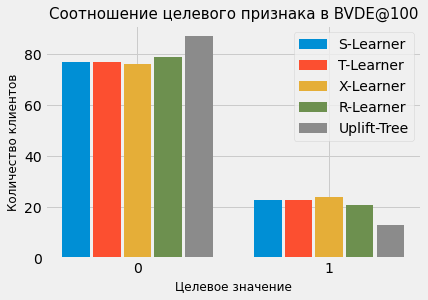

In [ ]:
data = {
        "S-Learner": df_bvde.sort_values(by=['bvde_s_learner'], ascending=False)['target'].iloc[:100].value_counts().values.tolist(),
        "T-Learner": df_bvde.sort_values(by=['bvde_t_learner'], ascending=False)['target'].iloc[:100].value_counts().values.tolist(),
        "X-Learner": df_bvde.sort_values(by=['bvde_x_learner'], ascending=False)['target'].iloc[:100].value_counts().values.tolist(),
        "R-Learner": df_bvde.sort_values(by=['bvde_r_learner'], ascending=False)['target'].iloc[:100].value_counts().values.tolist(),
        "Uplift-Tree": df_bvde.sort_values(by=['bvde_uplift_tree'], ascending=False)['target'].iloc[:100].value_counts().values.tolist()
    }
x = [0,1]
# create an index for each tick position
xi = list(range(len(x)))

fig, ax = plt.subplots()
bar_plot(ax, data, total_width=.8, single_width=.9)
plt.xlabel('Целевое значение', fontsize=12)
plt.ylabel('Количество клиентов', fontsize=12) 
plt.title('Соотношение целевого признака в BVDE@100', fontsize=15)
plt.xticks(xi, x)
plt.show()

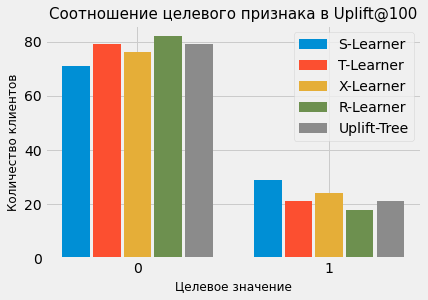

In [ ]:
data = {
        "S-Learner": df_all_scores.sort_values(by=['S-Learner'], ascending=False)['target'].iloc[:100].value_counts().values.tolist(),
        "T-Learner": df_all_scores.sort_values(by=['T-Learner'], ascending=False)['target'].iloc[:100].value_counts().values.tolist(),
        "X-Learner": df_all_scores.sort_values(by=['X-Learner'], ascending=False)['target'].iloc[:100].value_counts().values.tolist(),
        "R-Learner": df_all_scores.sort_values(by=['R-Learner'], ascending=False)['target'].iloc[:100].value_counts().values.tolist(),
        "Uplift-Tree": df_all_scores.sort_values(by=['Uplift-Tree'], ascending=False)['target'].iloc[:100].value_counts().values.tolist()
    }

x = [0,1]
# create an index for each tick position
xi = list(range(len(x)))

fig, ax = plt.subplots()
bar_plot(ax, data, total_width=.8, single_width=.9)
plt.xlabel('Целевое значение', fontsize=12)
plt.ylabel('Количество клиентов', fontsize=12) 
plt.title('Соотношение целевого признака в Uplift@100', fontsize=15)
plt.xticks(xi, x)
plt.show()

In [ ]:
df_fvde = pd.DataFrame()

alpha = 0.2

df_fvde['fvde_s_learner'] = pd.DataFrame(alpha * scaler.fit_transform(df_all_scores['S-Learner'].values.reshape(-1, 1)) + (1 - alpha) * scaler.fit_transform(y_history.reshape(-1, 1)))
df_fvde['fvde_t_learner'] = pd.DataFrame(alpha * scaler.fit_transform(df_all_scores['T-Learner'].values.reshape(-1, 1)) + (1 - alpha) * scaler.fit_transform(y_history.reshape(-1, 1)))
df_fvde['fvde_x_learner'] = pd.DataFrame(alpha * scaler.fit_transform(df_all_scores['X-Learner'].values.reshape(-1, 1)) + (1 - alpha) * scaler.fit_transform(y_history.reshape(-1, 1)))
df_fvde['fvde_r_learner'] = pd.DataFrame(alpha * scaler.fit_transform(df_all_scores['R-Learner'].values.reshape(-1, 1)) + (1 - alpha) * scaler.fit_transform(y_history.reshape(-1, 1)))
df_fvde['fvde_uplift_tree'] = pd.DataFrame(alpha * scaler.fit_transform(df_all_scores['Uplift-Tree'].values.reshape(-1, 1)) + (1 - alpha) * scaler.fit_transform(y_history.reshape(-1, 1)))

df_fvde = df_fvde.join(pd.Series(trmnt_val).rename('treatment').reset_index(drop=True)) # ['treatment']
df_fvde = df_fvde.join(pd.Series(y_val).rename('target').reset_index(drop=True)) # ['visit']

In [ ]:
df_fvde.head()

,fvde_s_learner,fvde_t_learner,fvde_x_learner,fvde_r_learner,fvde_uplift_tree,treatment,target
0,0.242172,0.194458,0.195340,0.153735,0.137164,1.0,0.0
1,0.452496,0.408155,0.410644,0.365047,0.318818,1.0,0.0
2,0.446250,0.406464,0.403550,0.358556,0.312572,0.0,0.0
3,0.225202,0.181444,0.183331,0.136765,0.120194,1.0,0.0
4,0.255574,0.211645,0.213722,0.168126,0.121897,1.0,0.0


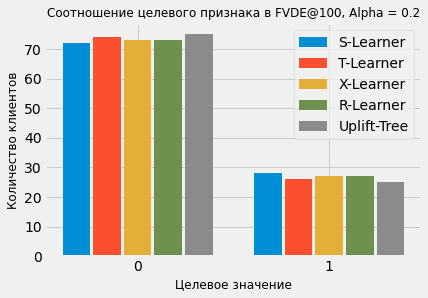

In [ ]:
data = {
        "S-Learner": df_fvde.sort_values(by=['fvde_s_learner'], ascending=False)['target'].iloc[:100].value_counts().values.tolist(),
        "T-Learner": df_fvde.sort_values(by=['fvde_t_learner'], ascending=False)['target'].iloc[:100].value_counts().values.tolist(),
        "X-Learner": df_fvde.sort_values(by=['fvde_x_learner'], ascending=False)['target'].iloc[:100].value_counts().values.tolist(),
        "R-Learner": df_fvde.sort_values(by=['fvde_r_learner'], ascending=False)['target'].iloc[:100].value_counts().values.tolist(),
        "Uplift-Tree": df_fvde.sort_values(by=['fvde_uplift_tree'], ascending=False)['target'].iloc[:100].value_counts().values.tolist()
    }
x = [0,1]
# create an index for each tick position
xi = list(range(len(x)))

fig, ax = plt.subplots()
bar_plot(ax, data, total_width=.8, single_width=.9)
plt.xlabel('Целевое значение', fontsize=12)
plt.ylabel('Количество клиентов', fontsize=12) 
plt.title('Соотношение целевого признака в FVDE@100, Alpha = 0.2', fontsize=12)
plt.xticks(xi, x)
plt.show()

In [ ]:
df_fvde = pd.DataFrame()

alpha = 0.4

df_fvde['fvde_s_learner'] = pd.DataFrame(alpha * scaler.fit_transform(df_all_scores['S-Learner'].values.reshape(-1, 1)) + (1 - alpha) * scaler.fit_transform(y_history.reshape(-1, 1)))
df_fvde['fvde_t_learner'] = pd.DataFrame(alpha * scaler.fit_transform(df_all_scores['T-Learner'].values.reshape(-1, 1)) + (1 - alpha) * scaler.fit_transform(y_history.reshape(-1, 1)))
df_fvde['fvde_x_learner'] = pd.DataFrame(alpha * scaler.fit_transform(df_all_scores['X-Learner'].values.reshape(-1, 1)) + (1 - alpha) * scaler.fit_transform(y_history.reshape(-1, 1)))
df_fvde['fvde_r_learner'] = pd.DataFrame(alpha * scaler.fit_transform(df_all_scores['R-Learner'].values.reshape(-1, 1)) + (1 - alpha) * scaler.fit_transform(y_history.reshape(-1, 1)))
df_fvde['fvde_uplift_tree'] = pd.DataFrame(alpha * scaler.fit_transform(df_all_scores['Uplift-Tree'].values.reshape(-1, 1)) + (1 - alpha) * scaler.fit_transform(y_history.reshape(-1, 1)))

df_fvde = df_fvde.join(pd.Series(trmnt_val).rename('treatment').reset_index(drop=True)) # ['treatment']
df_fvde = df_fvde.join(pd.Series(y_val).rename('target').reset_index(drop=True)) # ['visit']

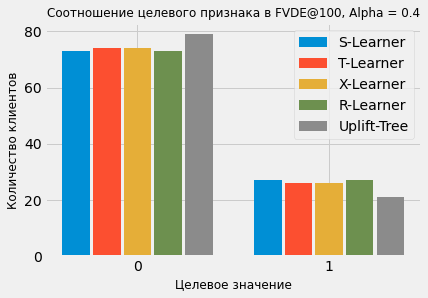

In [ ]:
data = {
        "S-Learner": df_fvde.sort_values(by=['fvde_s_learner'], ascending=False)['target'].iloc[:100].value_counts().values.tolist(),
        "T-Learner": df_fvde.sort_values(by=['fvde_t_learner'], ascending=False)['target'].iloc[:100].value_counts().values.tolist(),
        "X-Learner": df_fvde.sort_values(by=['fvde_x_learner'], ascending=False)['target'].iloc[:100].value_counts().values.tolist(),
        "R-Learner": df_fvde.sort_values(by=['fvde_r_learner'], ascending=False)['target'].iloc[:100].value_counts().values.tolist(),
        "Uplift-Tree": df_fvde.sort_values(by=['fvde_uplift_tree'], ascending=False)['target'].iloc[:100].value_counts().values.tolist()
    }
x = [0,1]
# create an index for each tick position
xi = list(range(len(x)))

fig, ax = plt.subplots()
bar_plot(ax, data, total_width=.8, single_width=.9)
plt.xlabel('Целевое значение', fontsize=12)
plt.ylabel('Количество клиентов', fontsize=12) 
plt.title('Соотношение целевого признака в FVDE@100, Alpha = 0.4', fontsize=12)
plt.xticks(xi, x)
plt.show()

In [ ]:
from matplotlib import pyplot as plt


def bar_plot(ax, data, colors=None, total_width=0.8, single_width=1, legend=True):
    """Draws a bar plot with multiple bars per data point.

    Parameters
    ----------
    ax : matplotlib.pyplot.axis
        The axis we want to draw our plot on.

    data: dictionary
        A dictionary containing the data we want to plot. Keys are the names of the
        data, the items is a list of the values.

        Example:
        data = {
            "x":[1,2,3],
            "y":[1,2,3],
            "z":[1,2,3],
        }

    colors : array-like, optional
        A list of colors which are used for the bars. If None, the colors
        will be the standard matplotlib color cyle. (default: None)

    total_width : float, optional, default: 0.8
        The width of a bar group. 0.8 means that 80% of the x-axis is covered
        by bars and 20% will be spaces between the bars.

    single_width: float, optional, default: 1
        The relative width of a single bar within a group. 1 means the bars
        will touch eachother within a group, values less than 1 will make
        these bars thinner.

    legend: bool, optional, default: True
        If this is set to true, a legend will be added to the axis.
    """

    # Check if colors where provided, otherwhise use the default color cycle
    if colors is None:
        colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

    # Number of bars per group
    n_bars = len(data)

    # The width of a single bar
    bar_width = total_width / n_bars

    # List containing handles for the drawn bars, used for the legend
    bars = []

    # Iterate over all data
    for i, (name, values) in enumerate(data.items()):
        # The offset in x direction of that bar
        x_offset = (i - n_bars / 2) * bar_width + bar_width / 2

        # Draw a bar for every value of that type
        for x, y in enumerate(values):
            bar = ax.bar(x + x_offset, y, width=bar_width * single_width, color=colors[i % len(colors)])

        # Add a handle to the last drawn bar, which we'll need for the legend
        bars.append(bar[0])

    # Draw legend if we need
    if legend:
        ax.legend(bars, data.keys())

In [ ]:
df_all_scores

,S-Learner,T-Learner,X-Learner,R-Learner,Uplift-Tree,treatment,target
0,0.040252,0.020058,0.032751,0.033257,0.057546,1.0,0.0
1,0.040835,0.046742,0.054170,0.047534,0.067997,1.0,0.0
2,0.035860,0.059239,0.049322,0.068762,0.061095,0.0,0.0
3,0.062404,0.063516,0.091065,0.000773,0.065220,1.0,0.0
4,0.065695,0.067897,0.078435,0.080125,0.067997,1.0,0.0
...,...,...,...,...,...,...,...
19195,0.107002,0.125699,0.107493,0.098126,0.067997,1.0,0.0
19196,0.045367,0.043328,0.045719,0.048642,0.055243,0.0,0.0
19197,0.045377,0.044374,0.046349,0.047394,0.055243,1.0,0.0
19198,0.057712,0.083522,0.081752,0.051658,0.061131,0.0,0.0


In [ ]:
print(df_bvde['bvde_s_learner'].mean())
print(df_bvde['bvde_t_learner'].mean())
print(df_bvde['bvde_x_learner'].mean())
print(df_bvde['bvde_r_learner'].mean())
print(df_bvde['bvde_uplift_tree'].mean())

0.8411035771965019
0.8290829997604592
0.8648366357329742
0.6856890812629635
0.6308777872704144
